# Домашнее задание по теме: Регрессия (линейная/полиномиальная)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод. 

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Вместо строки `место_для_ответа` необходимо вписать свой ответ. Не рядом, а вместо. Остальную часть оформления менять не нужно.

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Можно использовать `Pipeline`, но не обязательно.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Загрузка данных

[Источник (Apartment data)](https://www.kaggle.com/gunhee/koreahousedata)

In [7]:
df = pd.read_csv("./../../data/Daegu_Real_Estate_data.csv")

pd.options.display.max_columns = None

df

SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor HallwayType  \
0        141592       2006    2007          8        814      3    terraced   
1         51327       1985    2007          8        587      8    corridor   
2         48672       1985    2007          8        587      6    corridor   
3        380530       2006    2007          8       2056      8    terraced   
4        221238       1993    2007          8       1761      3       mixed   
...         ...        ...     ...        ...        ...    ...         ...   
5886     511504       2007    2017          8       1643     19    terraced   
5887     298230       2006    2017          8        903     13    terraced   
5888     357522       2007    2017          8        868     20    terraced   
5889     312389       1978    2017          8       1327      1    corridor   
5890     393805       2007    2017          8        868     13    terraced   

             HeatingType        AptManageType  N_Parkinglot(Ground)  \
0     individual_heating  management_in_trust                 111.0   
1     individual_heating      self_management                  80.0   
2     individual_heating      self_management                  80.0   
3     individual_heating  management_in_trust                 249.0   
4     individual_heating  management_in_trust                 523.0   
...                  ...                  ...                   ...   
5886  individual_heating  management_in_trust                   0.0   
5887  individual_heating  management_in_trust                 123.0   
5888  individual_heating  management_in_trust                   0.0   
5889  individual_heating      self_management                  87.0   
5890  individual_heating  management_in_trust                   0.0   

      N_Parkinglot(Basement) TimeToBusStop TimeToSubway  N_APT  N_manager  \
0                      184.0    5min~10min  10min~15min    3.0        3.0   
1                       76.0        0~5min   5min~10min    1.0        2.0   
2                       76.0        0~5min   5min~10min    1.0        2.0   
3                      536.0        0~5min       0-5min    6.0        5.0   
4                      536.0        0~5min  15min~20min    8.0        8.0   
...                      ...           ...          ...    ...        ...   
5886                  1270.0        0~5min       0-5min    7.0       14.0   
5887                   181.0    5min~10min       0-5min    3.0        3.0   
5888                  1270.0        0~5min       0-5min    7.0       14.0   
5889                     0.0        0~5min       0-5min    2.0        1.0   
5890                  1270.0        0~5min       0-5min    7.0       14.0   

      N_elevators          SubwayStation  N_FacilitiesNearBy(PublicOffice)  \
0             0.0  Kyungbuk_uni_hospital                               2.0   
1             2.0                  Daegu                               5.0   
2             2.0                  Daegu                               5.0   
3            11.0                Sin-nam                               1.0   
4            20.0              Myung-duk                               6.0   
...           ...                    ...                               ...   
5886         16.0  Kyungbuk_uni_hospital                               3.0   
5887         11.0              Myung-duk                               3.0   
5888         16.0  Kyungbuk_uni_hospital                               3.0   
5889          4.0  Kyungbuk_uni_hospital                               3.0   
5890         16.0  Kyungbuk_uni_hospital                               3.0   

      N_FacilitiesNearBy(Hospital)  N_FacilitiesNearBy(Dpartmentstore)  \
0                                1                                 1.0   
1                                1                                 2.0   
2                                1                                 2.0   
3                                1            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

## Преобразование типов

Привести в порядок типы данных:
    - Колонки с датами (год, месяц, ...).
    - Колонки типа `object` должны стать чем-то другим.

## Выбросы

- Есть ли выбросы?
- Нужно ли с этим что-то делать?

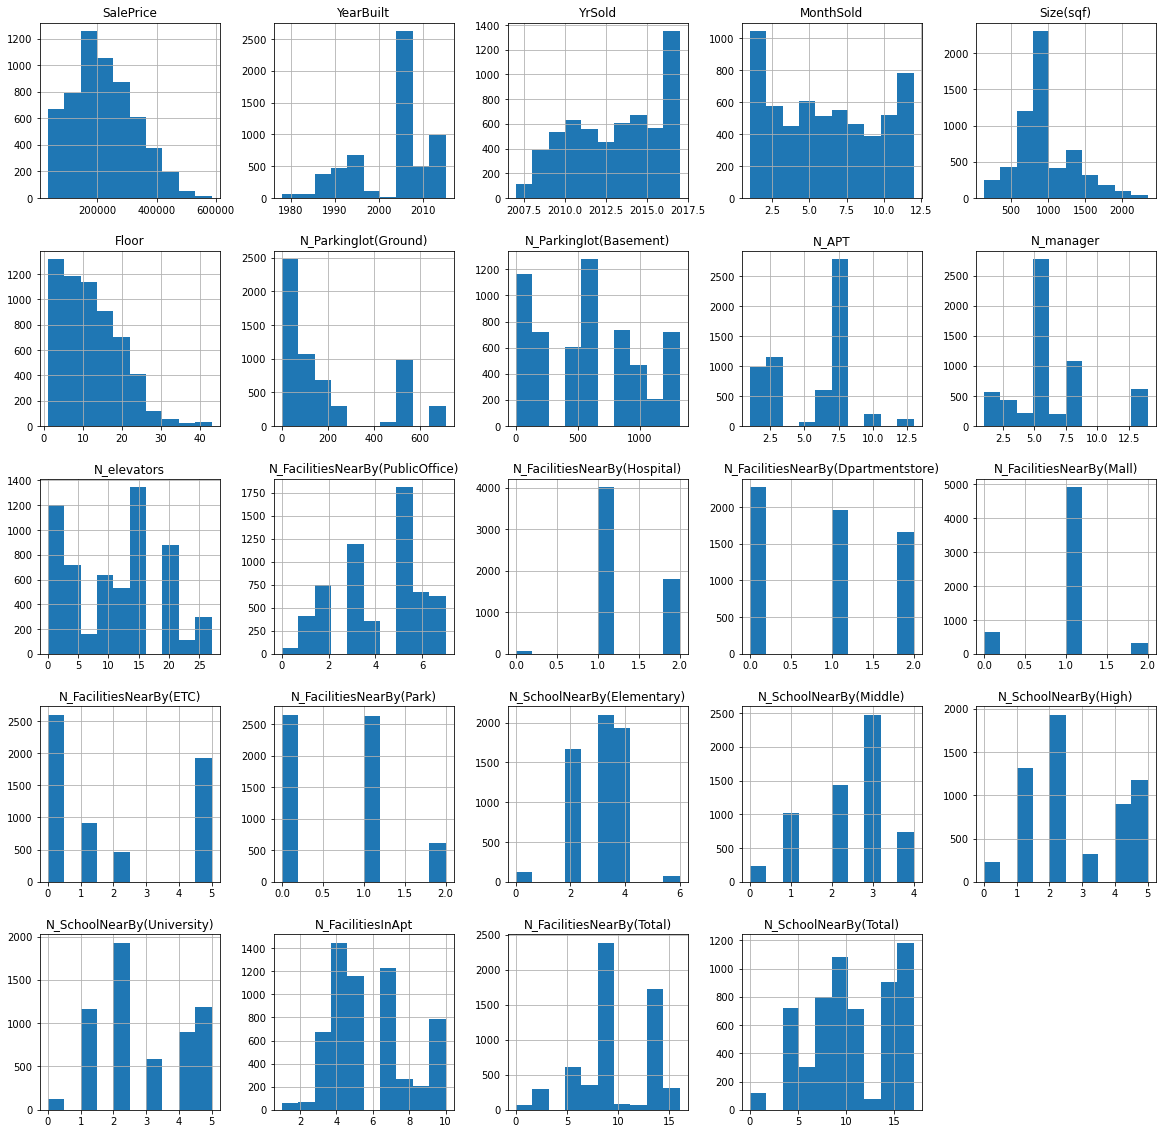

In [9]:
_ = df.hist(figsize = (20, 20))

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Text(0.5, 1.0, 'Correlation Matrix of features')

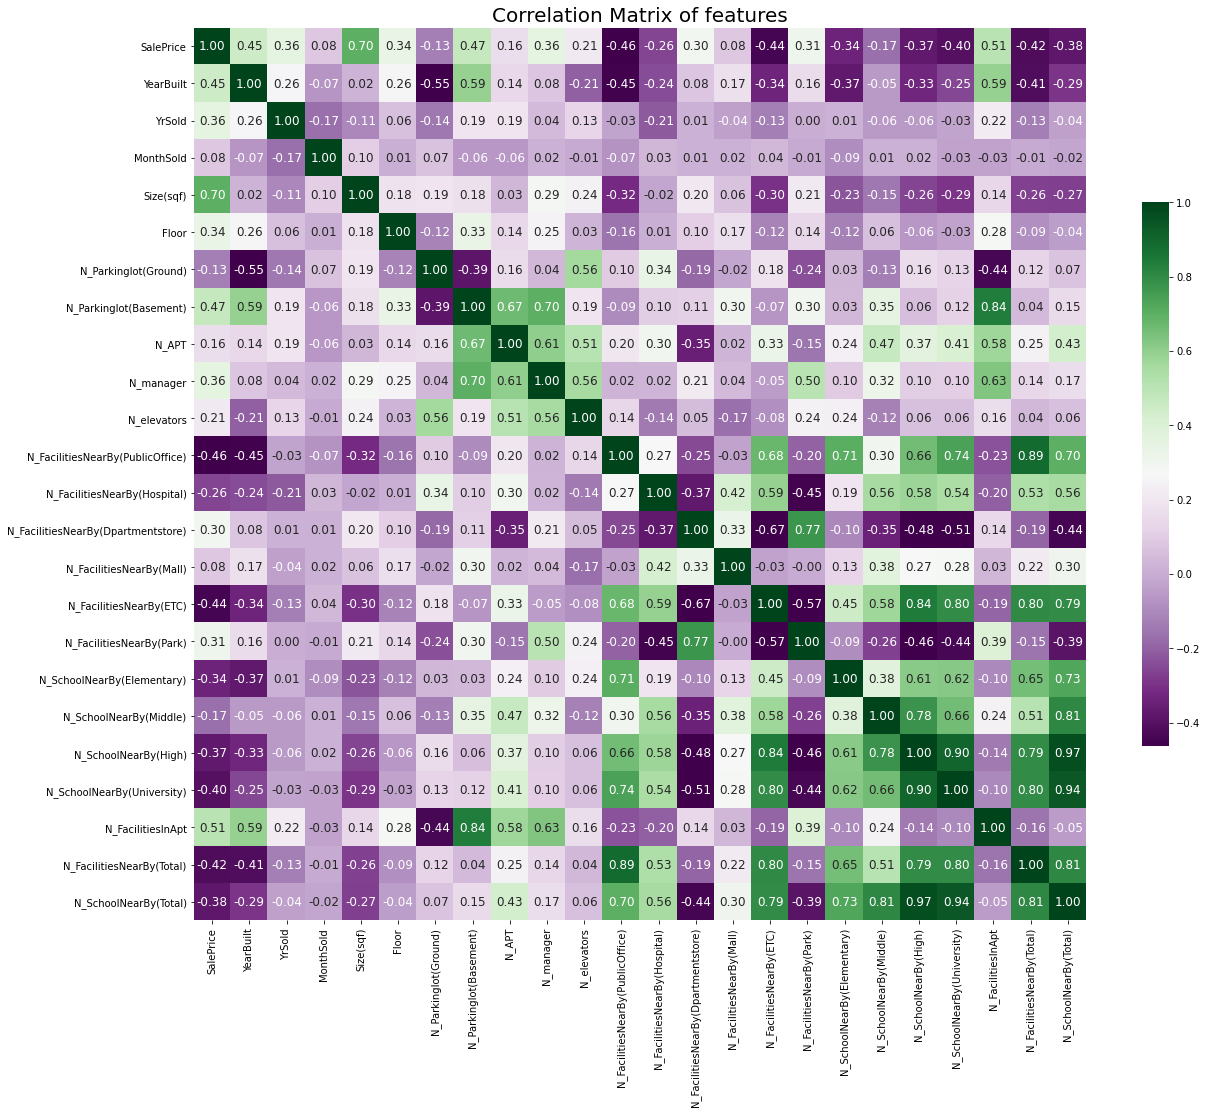

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))

ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True
)

plt.title('Correlation Matrix of features', fontsize=20)

## Простая линейная регрессия

Пока что используется только один признак.

- Разделить данные на `y` и `X`.
- Разделить данные на train / test.
- Если необходимо, то использовать методы feature engineering. 
- Обучить модель простой линейной регрессии.
- Проанализировать результаты (различные метрики).
- Нарисовать график.

In [11]:
from sklearn.model_selection import train_test_split

y = df['SalePrice'].copy()
X = df[['Size(sqf)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression

simple_regr = LinearRegression()
simple_regr.fit(X_train, y_train)
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ', simple_regr.intercept_)

Coefficients:  [193.93234866]
Intercept:  36370.866958315804


In [13]:
plt.scatter(X_train, y_train,  color='red')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

plt.plot(X_train, simple_regr.coef_[0]*X_train + simple_regr.intercept_, '-g', linewidth=6)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

Text(0, 0.5, 'price')

In [14]:
y_predicted = simple_regr.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

R2: 0.47436701273009196
MSE: 5924153771.529656


## Множественная линейная регрессия

Можно использовать любое количество признаков.

- Разделить данные на `y` и `X`.
- Разделить данные на train / test.
- Если необходимо, то использовать методы feature engineering. 
- Обучить модель простой линейной регрессии.
- Проанализировать результаты (различные метрики).

In [15]:
# выбрать даннные для обучения / предсказания
y = df['SalePrice'].copy()
X = df[['Size(sqf)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
multiple_regr = LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

Coefficients:  [1.77700140e+02 1.74656128e+04 1.32813758e+01]
Intercept:  -56854.56623145929
R2: 0.6564019741105012
MSE: 3782054156.6184144


---

In [17]:
df_num = df.select_dtypes(include=[np.number])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   N_Parkinglot(Ground)                5891 non-null   float64
 7   N_Parkinglot(Basement)              5891 non-null   float64
 8   N_APT                               5891 non-null   float64
 9   N_manager                           5891 non-null   float64
 10  N_elevators                         5891 non-null   float64
 11  N_FacilitiesNearBy(PublicOffice)    5891 no

In [18]:
df_obj = df.select_dtypes(exclude=[np.number])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HallwayType    5891 non-null   object
 1   HeatingType    5891 non-null   object
 2   AptManageType  5891 non-null   object
 3   TimeToBusStop  5891 non-null   object
 4   TimeToSubway   5891 non-null   object
 5   SubwayStation  5891 non-null   object
dtypes: object(6)
memory usage: 276.3+ KB


In [19]:
df_obj.columns

Index(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'],
      dtype='object')

In [20]:
# разделить независимую и зависимую переменные / train и test
y = df['SalePrice'].copy()
X = df.drop(['SalePrice'], axis=1)
X = X.drop(df_obj.columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
multiple_regr = LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

Coefficients:  [  1020.97952248  12298.73093069   2146.58433201    166.11741217
   1135.0036352      48.9352802      98.08737729  -9004.34477137
  -4108.74639346   1413.09997062   2138.50923581 -16882.64277154
  35108.52885044 -16140.14871111  11838.29265656 -22164.98075753
  -7623.92437415   2832.03076687   8872.09717354  -5617.82176413
  10325.02904244  -6102.44149737  -1537.61819786]
Intercept:  -26754040.053671807
R2: 0.8579561677007917
MSE: 1563505683.650228


## Полиномиальная множественная регрессия